In [1]:
import pandas as pd
from pandas_profiling import ProfileReport 
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
train_data=pd.read_csv('C:/Users/Rita/Desktop/project/Solar-Radiation-Prediction/solar_train.csv')
print('Data Shape:', train_data.shape)
train_data.head()

Data Shape: (26148, 12)


,Id,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation
0,4152,1473879005,9/14/2016 12:00:00 AM,08:50:05,57,30.45,68,26.70,4.50,06:10:00,18:26:00,680.04
1,13047,1476293121,10/12/2016 12:00:00 AM,07:25:21,50,30.47,96,144.96,10.12,06:16:00,18:02:00,277.37
2,7420,1477993220,10/31/2016 12:00:00 AM,23:40:20,47,30.48,56,119.52,3.37,06:23:00,17:49:00,1.29
3,6508,1473013505,9/4/2016 12:00:00 AM,08:25:05,57,30.47,93,38.61,2.25,06:08:00,18:35:00,544.75
4,29110,1481885434,12/16/2016 12:00:00 AM,00:50:34,41,30.23,103,177.55,2.25,06:50:00,17:46:00,1.22


In [3]:
sample_submission=pd.read_csv('C:/Users/Rita/Desktop/project/Solar-Radiation-Prediction/sample_submission.csv')
print('Data Shape:', sample_submission.shape)
sample_submission.head()

Data Shape: (6537, 2)


,22107,675.86
0,3780,1286.85
1,13651,1.23
2,30473,4.43
3,9084,1.22
4,12469,546.85


In [4]:
train_data.describe()

,Id,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Radiation
count,26148.000000,2.614800e+04,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000
mean,16337.578668,1.478046e+09,51.104865,30.422835,75.005239,143.259970,6.248521,208.044780
std,9449.975676,3.005885e+06,6.213912,0.054724,25.993102,82.988177,3.484166,316.090247
min,0.000000,1.472724e+09,34.000000,30.190000,11.000000,0.090000,0.000000,1.130000
25%,8125.750000,1.475533e+09,46.000000,30.400000,56.000000,81.977500,3.370000,1.230000
50%,16379.000000,1.478038e+09,50.000000,30.430000,85.000000,147.645000,5.620000,2.710000
75%,24507.250000,1.480478e+09,55.000000,30.460000,97.000000,179.220000,7.870000,358.945000
max,32685.000000,1.483265e+09,71.000000,30.560000,103.000000,359.950000,39.370000,1601.260000


In [5]:
profile = ProfileReport(df = train_data)
profile.to_file(output_file = 'Pre-Profiling Report.html')

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
#drop_cols = ['region','Date']
train_data=train_data.drop(labels=None, axis=0, index=None, columns='Data', level=None, inplace=False, errors='raise')
train_data=train_data.drop(labels=None, axis=0, index=None, columns='Time', level=None, inplace=False, errors='raise')
train_data=train_data.drop(labels=None, axis=0, index=None, columns='TimeSunRise', level=None, inplace=False, errors='raise')
train_data=train_data.drop(labels=None, axis=0, index=None, columns='TimeSunSet', level=None, inplace=False, errors='raise')


In [6]:
test_data=pd.read_csv('C:/Users/Rita/Desktop/project/Solar-Radiation-Prediction/solar_test.csv')
print('Data Shape:', test_data.shape)
test_data.head()

Data Shape: (6538, 11)


,Id,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,22107,1478720107,11/9/2016 12:00:00 AM,09:35:07,59,30.47,44,312.67,3.37,06:28:00,17:45:00
1,3780,1474063503,9/16/2016 12:00:00 AM,12:05:03,59,30.48,83,38.01,6.75,06:10:00,18:25:00
2,13651,1476109221,10/10/2016 12:00:00 AM,04:20:21,47,30.39,78,213.62,5.62,06:16:00,18:03:00
3,30473,1481475056,12/11/2016 12:00:00 AM,06:50:56,45,30.40,98,176.63,4.50,06:47:00,17:44:00
4,9084,1477493117,10/26/2016 12:00:00 AM,04:45:17,45,30.40,34,175.89,6.75,06:21:00,17:52:00


In [7]:
test_data=test_data.drop(labels=None, axis=0, index=None, columns='Data', level=None, inplace=False, errors='raise')
test_data=test_data.drop(labels=None, axis=0, index=None, columns='Time', level=None, inplace=False, errors='raise')
test_data=test_data.drop(labels=None, axis=0, index=None, columns='TimeSunRise', level=None, inplace=False, errors='raise')
test_data=test_data.drop(labels=None, axis=0, index=None, columns='TimeSunSet', level=None, inplace=False, errors='raise')


In [8]:
train_data.isnull().sum()

Id                        0
UNIXTime                  0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
Radiation                 0
dtype: int64

Text(0.5, 1.0, 'Correlation between features')

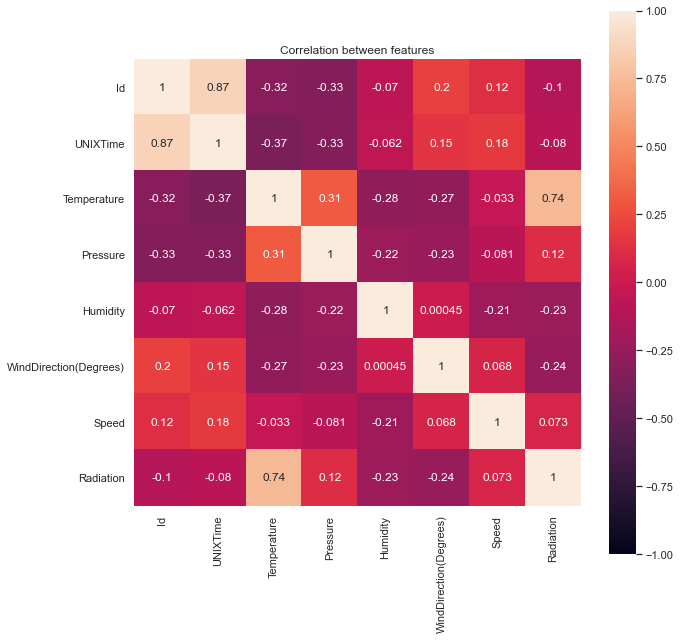

In [8]:
corr = train_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, square = True, annot = True,vmin=-1, vmax=1) #  vmin=-1, vmax=1
plt.title('Correlation between features')

Text(0.5, 1.0, 'Correlation between features')

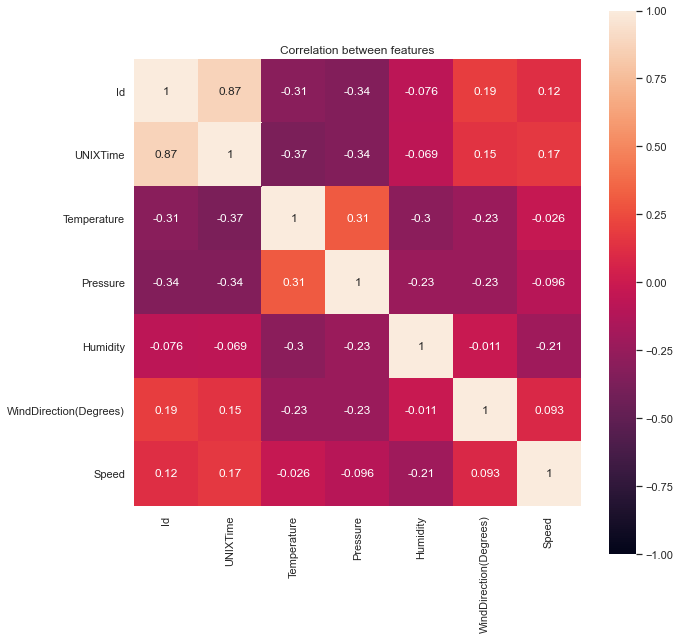

In [9]:
corr = test_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, square = True, annot = True,vmin=-1, vmax=1) #  vmin=-1, vmax=1
plt.title('Correlation between features')

In [9]:
train_data.shape[1]

8

In [10]:
train_data['Radiation'].value_counts()

1.22      1751
1.23      1692
1.21      1623
1.24      1357
1.20      1247
          ... 
166.17       1
85.67        1
222.47       1
767.44       1
899.86       1
Name: Radiation, Length: 11826, dtype: int64

In [11]:
train_data['Radiation'].sum()/train_data['Radiation'].shape[0]

208.04478048034267

In [14]:
X = train_data.drop(['Radiation'], axis=1)
X.head()

,Id,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,4152,1473879005,57,30.45,68,26.70,4.50
1,13047,1476293121,50,30.47,96,144.96,10.12
2,7420,1477993220,47,30.48,56,119.52,3.37
3,6508,1473013505,57,30.47,93,38.61,2.25
4,29110,1481885434,41,30.23,103,177.55,2.25


In [15]:
y = train_data["Radiation"]
y

0        680.04
1        277.37
2          1.29
3        544.75
4          1.22
          ...  
26143    216.29
26144      1.47
26145      1.20
26146    659.12
26147      1.18
Name: Radiation, Length: 26148, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20918, 7)
(20918,)
(5230, 7)
(5230,)


In [19]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred_lr=model_lr.predict(X_test)

In [21]:
x_pred_lr=model_lr.predict(X_train)
y_pred_lr=model_lr.predict(X_test)

In [22]:
y_p=model_lr.predict(test_data)
y_p

array([446.31888645, 463.77313928, -20.77409338, ..., 127.14464645,
       154.78545315, 545.3040473 ])

In [23]:
prediction_rf1 = pd.DataFrame()
prediction1_rf1 = model_lr.predict(test_data)
test_prediction1_rf1=prediction1_rf1
test_prediction1_rf1

array([446.31888645, 463.77313928, -20.77409338, ..., 127.14464645,
       154.78545315, 545.3040473 ])

In [34]:
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_test, y_pred_lr, squared=True)
print(rms)

40303.48453525304


In [33]:
predict = model_lr.predict(X_test)
pred=pd.DataFrame(predict)
#print(test_data['Id'])
pred1=pred
print(pred1)

               0
0     228.319261
1     140.109750
2      55.665984
3     657.242115
4     -54.413763
...          ...
5225  -39.468168
5226  143.635251
5227  293.196520
5228  264.107502
5229    8.978064

[5230 rows x 1 columns]


In [42]:
predic = pd.DataFrame(test_prediction1_rf1,test_data.Id,columns=['predict']).to_csv('data.csv',header=False)